In [71]:
import pandas as pd
import regex
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import brown
from sklearn.feature_extraction.text import CountVectorizer
import wordcloud
import spacy
import stanza
stanza.download('en',verbose=False)
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [72]:
df=pd.read_csv(r"C:/Users/aleja/Documents/KU Leuven/Second semester/Modern Data Analytics/MDA Project/mda-kuwait/speeches_csv/all_speeches.txt")
df.head(15)

,title,pages,date,location,highest_speaker_count,content
0,CGI_2013,19,24 September 2013,"Sheraton New York Hotel and Towers, New York, ...",10,Hillary Clinton: Thank you very much. I have t...
1,Prayer_Breakfast_2016,7,4 February 2016,"Washington Hilton, Washington, D.C.",0,"Well, good morning. Giving all praise and hono..."
2,Security_Team_Announcement,5,1 December 2008,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ..."
3,Cairo_University,14,4 June 2009,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...
4,Umpqua_Community_College_Shootings,4,1 October 2015,"Washington, D.C.",0,There's been another mass shooting in America ...
5,White_House_Correspondent_Dinner_2013,6,27 April 2013,"Washington Hilton Hotel, Washington, D.C.",0,"Thank you. Thank you, everybody. How do you li..."
6,Border_Security_and_Immigration_Reform,5,30 June 2014,unknown_location,0,"Good afternoon, everybody. One year ago this m..."
7,Senate_Floor_Immigration_Reform,5,23 May 2007,"Washington, D.C.",0,"Mr. President, Last year I spoke1 at one of th..."
8,Presser_on_the_Economy_and_Debt_Limit,21,29 June 2011,"East Room of the White House, Washington, D.C.",26,I just want to say a few words about the econo...
9,Kennedy_Center_Honorees_2009,6,6 December 2009,unknown_location,4,President Obama: Thank you. On behalf of Miche...


In [73]:
df['text']=df['content'].str.lower()
df.head(15)

,title,pages,date,location,highest_speaker_count,content,text
0,CGI_2013,19,24 September 2013,"Sheraton New York Hotel and Towers, New York, ...",10,Hillary Clinton: Thank you very much. I have t...,hillary clinton: thank you very much. i have t...
1,Prayer_Breakfast_2016,7,4 February 2016,"Washington Hilton, Washington, D.C.",0,"Well, good morning. Giving all praise and hono...","well, good morning. giving all praise and hono..."
2,Security_Team_Announcement,5,1 December 2008,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ...","good morning, everybody. i hope you all had a ..."
3,Cairo_University,14,4 June 2009,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...,thank you so much. good afternoon. i am honore...
4,Umpqua_Community_College_Shootings,4,1 October 2015,"Washington, D.C.",0,There's been another mass shooting in America ...,there's been another mass shooting in america ...
5,White_House_Correspondent_Dinner_2013,6,27 April 2013,"Washington Hilton Hotel, Washington, D.C.",0,"Thank you. Thank you, everybody. How do you li...","thank you. thank you, everybody. how do you li..."
6,Border_Security_and_Immigration_Reform,5,30 June 2014,unknown_location,0,"Good afternoon, everybody. One year ago this m...","good afternoon, everybody. one year ago this m..."
7,Senate_Floor_Immigration_Reform,5,23 May 2007,"Washington, D.C.",0,"Mr. President, Last year I spoke1 at one of th...","mr. president, last year i spoke1 at one of th..."
8,Presser_on_the_Economy_and_Debt_Limit,21,29 June 2011,"East Room of the White House, Washington, D.C.",26,I just want to say a few words about the econo...,i just want to say a few words about the econo...
9,Kennedy_Center_Honorees_2009,6,6 December 2009,unknown_location,4,President Obama: Thank you. On behalf of Miche...,president obama: thank you. on behalf of miche...


In [74]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['text'] = df['text'].apply(lambda text: remove_stopwords(text))
df.head(15)

,title,pages,date,location,highest_speaker_count,content,text
0,CGI_2013,19,24 September 2013,"Sheraton New York Hotel and Towers, New York, ...",10,Hillary Clinton: Thank you very much. I have t...,hillary clinton: thank much. great pleasure in...
1,Prayer_Breakfast_2016,7,4 February 2016,"Washington Hilton, Washington, D.C.",0,"Well, good morning. Giving all praise and hono...","well, good morning. giving praise honor god br..."
2,Security_Team_Announcement,5,1 December 2008,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ...","good morning, everybody. hope wonderful thanks..."
3,Cairo_University,14,4 June 2009,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...,thank much. good afternoon. honored timeless c...
4,Umpqua_Community_College_Shootings,4,1 October 2015,"Washington, D.C.",0,There's been another mass shooting in America ...,"there's another mass shooting america -- time,..."
5,White_House_Correspondent_Dinner_2013,6,27 April 2013,"Washington Hilton Hotel, Washington, D.C.",0,"Thank you. Thank you, everybody. How do you li...","thank you. thank you, everybody. like new entr..."
6,Border_Security_and_Immigration_Reform,5,30 June 2014,unknown_location,0,"Good afternoon, everybody. One year ago this m...","good afternoon, everybody. one year ago month,..."
7,Senate_Floor_Immigration_Reform,5,23 May 2007,"Washington, D.C.",0,"Mr. President, Last year I spoke1 at one of th...","mr. president, last year spoke1 one marches ch..."
8,Presser_on_the_Economy_and_Debt_Limit,21,29 June 2011,"East Room of the White House, Washington, D.C.",26,I just want to say a few words about the econo...,want say words economy take questions. lot fol...
9,Kennedy_Center_Honorees_2009,6,6 December 2009,unknown_location,4,President Obama: Thank you. On behalf of Miche...,president obama: thank you. behalf michelle my...


In [108]:
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['tokenized_sents']=df['text'].apply(lambda row: nltk.sent_tokenize(row))
def wordtoken(text):
    return  [tokenizer.tokenize(word) for word in text]
df['tokenized_words']=df['tokenized_sents'].apply(lambda row: wordtoken(row))
def lemma_text(text,f):
    return  [[lemmatizer.lemmatize(word,pos=f) for word in sent] for sent in text ]

df['lemma']=df['tokenized_words'].apply(lambda row: lemma_text(row,'v'))
df['lemma']=df['tokenized_words'].apply(lambda row: lemma_text(row,'n'))
df['lemma']=df['tokenized_words'].apply(lambda row: lemma_text(row,'a'))
def nonumbers(text):
    return " ".join([element for sent in text for element in sent if not element.isdigit()])
df['new_text']=df['lemma'].apply(lambda row: nonumbers(row))

def remove_expressions(text):
    """custom function to remove the frequent words"""
    return " ".join([(re.sub("\d\d+th|\d\d+st|\d\d\d\d+s|\d+nd|\d+rd|\d+st|\d+th|\d\d+s|\d+d", "", word) ) for word in str(text).split() ])

df['wo_exp'] = df['new_text'].apply(lambda text: remove_expressions(text))
df.iloc[2]['wo_exp']



'good morning everybody hope wonderful thanksgiving last week announced economic team working speak craft economic recovery program create jobs grow struggling economy today vice president elect biden pleased announce national security team national security challenges face grave urgent economic crisis fighting two wars old conflicts remain unresolved newly assertive powers put strains international system spread nuclear weapons raises peril world s deadly technologies could fall dangerous hands dependence foreign oil empowers authoritarian governments endangers planet america must also strong home strong abroad need provide education opportunity citizens every american compete anyone anywhere economic power must sustain military strength diplomatic leverage global leadership common thread linking challenges fundamental reality  century destiny shared world s markets security public health climate must act understanding that ever stake happens across globe learned painfully terror cann

In [109]:
lda = LatentDirichletAllocation(n_components=10,random_state=0)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')
tf_matrix = tf_vectorizer.fit_transform(df['wo_exp'])
tf_df = pd.DataFrame(tf_matrix.toarray())
tf_feature_names = tf_vectorizer.get_feature_names()
tf_df.columns = tf_feature_names
tf_df

,1abraham,401ks,aa,aaa,aaron,aarp,abadi,abandon,abandoned,abandoning,...,zika,zimbabwe,zimbabweans,zimmerman,zionism,zionist,zip,zone,zones,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,0,0,1,0,0,...,4,0,0,0,0,0,0,0,0,0
434,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [110]:
lda.fit(tf_matrix) 

LatentDirichletAllocation(random_state=0)

In [111]:
result = pd.DataFrame(lda.components_)
result.columns = tf_feature_names
result

,1abraham,401ks,aa,aaa,aaron,aarp,abadi,abandon,abandoned,abandoning,...,zika,zimbabwe,zimbabweans,zimmerman,zionism,zionist,zip,zone,zones,zuma
0,0.100002,8.099826,2.099913,2.099904,4.713733,0.100003,0.100001,3.583556,0.615169,0.100004,...,0.100030,0.100001,0.100002,2.099884,0.100000,0.100000,4.099958,1.644042,6.422690,0.100000
1,0.100000,0.100003,0.100000,0.100000,0.100001,0.100000,0.100001,11.383676,3.180635,3.099901,...,4.254627,0.100044,0.100024,0.100000,2.099915,1.855127,0.100000,0.100107,0.100648,0.100045
2,0.100000,0.100043,0.100043,0.100000,0.100000,4.099987,0.100003,0.100013,2.910257,0.100001,...,15.269180,0.100002,0.100001,0.100000,0.100000,0.100000,0.100005,0.100001,0.100003,0.100000
3,0.100009,0.100078,0.100008,0.100096,0.100000,0.100008,0.100000,5.255847,0.100061,0.100000,...,0.100002,0.100003,0.100000,0.100000,0.100000,0.100000,0.100014,0.100006,0.100003,0.100005
4,0.100000,0.100015,0.100023,0.100000,0.100000,0.100000,0.100002,2.521026,3.743976,0.100009,...,2.776086,0.100011,0.100145,0.100000,0.100040,0.100004,0.100002,10.148355,0.100003,0.100000
5,2.099987,0.100014,0.100013,0.100000,0.100011,0.100001,0.100000,0.109803,2.049828,0.100001,...,0.100002,4.099935,3.099827,0.100067,0.100020,2.344865,0.100010,0.100015,0.100066,3.099938
6,0.100000,0.100003,0.100000,0.100000,0.100006,0.100000,0.100014,0.100032,0.100018,0.100002,...,0.100013,0.100002,0.100000,0.100000,0.100000,0.100000,0.100006,0.100002,0.100011,0.100005
7,0.100000,0.100003,0.100000,0.100000,0.100018,0.100000,20.099972,9.492129,0.100036,0.100048,...,0.100047,0.100002,0.100000,0.100009,0.100016,0.100005,0.100005,13.254075,4.776549,0.100006
8,0.100002,0.100014,0.100000,0.100000,2.486232,0.100001,0.100006,4.353919,0.100022,0.100035,...,0.100015,0.100000,0.100000,0.100040,0.100009,0.100000,0.100000,4.353397,0.100027,0.100000
9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


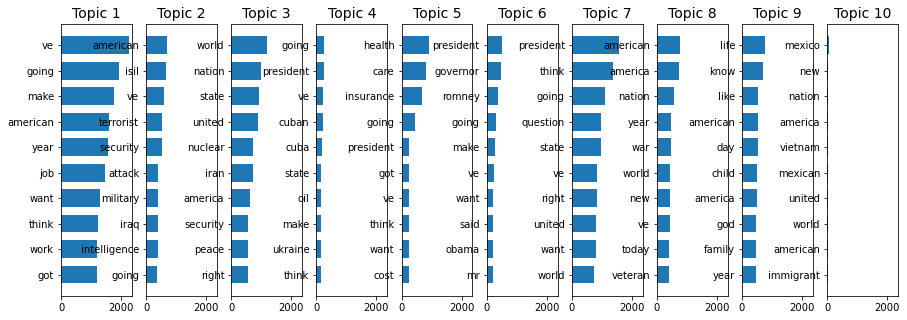

In [56]:
n_top_words = 10
fig, axes = plt.subplots(1, 10, figsize=(15, 5), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tf_feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 14})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)

In [124]:
from collections import Counter
cnt1 = Counter()
for text in df["wo_exp"].values:
    for word in text.split():
        cnt1[word] += 1
        
mostcommon=cnt1.most_common(20)
mostcommon = [x[0] for x in mostcommon]
mostcommon

['s',
 'we',
 'people',
 'that',
 've',
 'i',
 're',
 'us',
 'going',
 'president',
 'one',
 'make',
 'world',
 'think',
 'good',
 'america',
 'want',
 'know',
 'like',
 'time']

In [125]:
def remove_frequent(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in mostcommon])

df['wo_freq'] = df['wo_exp'].apply(lambda text: remove_frequent(text))


df.head(15)

,title,pages,date,location,highest_speaker_count,content,text,tokenized_sents,tokenized_words,lemma,new_text,wo_exp,wo_freq
0,CGI_2013,19,24 September 2013,"Sheraton New York Hotel and Towers, New York, ...",10,Hillary Clinton: Thank you very much. I have t...,hillary clinton: thank much. great pleasure in...,"[hillary clinton: thank much., great pleasure ...","[[hillary, clinton, thank, much], [great, plea...","[[hillary, clinton, thank, much], [great, plea...",hillary clinton thank much great pleasure intr...,hillary clinton thank much great pleasure intr...,hillary clinton thank much great pleasure intr...
1,Prayer_Breakfast_2016,7,4 February 2016,"Washington Hilton, Washington, D.C.",0,"Well, good morning. Giving all praise and hono...","well, good morning. giving praise honor god br...","[well, good morning., giving praise honor god ...","[[well, good, morning], [giving, praise, honor...","[[well, good, morning], [giving, praise, honor...",well good morning giving praise honor god brin...,well good morning giving praise honor god brin...,well morning giving praise honor god bringing ...
2,Security_Team_Announcement,5,1 December 2008,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ...","good morning, everybody. hope wonderful thanks...","[good morning, everybody., hope wonderful than...","[[good, morning, everybody], [hope, wonderful,...","[[good, morning, everybody], [hope, wonderful,...",good morning everybody hope wonderful thanksgi...,good morning everybody hope wonderful thanksgi...,morning everybody hope wonderful thanksgiving ...
3,Cairo_University,14,4 June 2009,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...,thank much. good afternoon. honored timeless c...,"[thank much., good afternoon., honored timeles...","[[thank, much], [good, afternoon], [honored, t...","[[thank, much], [good, afternoon], [honored, t...",thank much good afternoon honored timeless cit...,thank much good afternoon honored timeless cit...,thank much afternoon honored timeless city cai...
4,Umpqua_Community_College_Shootings,4,1 October 2015,"Washington, D.C.",0,There's been another mass shooting in America ...,"there's another mass shooting america -- time,...",[there's another mass shooting america -- time...,"[[there, s, another, mass, shooting, america, ...","[[there, s, another, mass, shooting, america, ...",there s another mass shooting america time com...,there s another mass shooting america time com...,there another mass shooting community college ...
5,White_House_Correspondent_Dinner_2013,6,27 April 2013,"Washington Hilton Hotel, Washington, D.C.",0,"Thank you. Thank you, everybody. How do you li...","thank you. thank you, everybody. like new entr...","[thank you., thank you, everybody., like new e...","[[thank, you], [thank, you, everybody], [like,...","[[thank, you], [thank, you, everybody], [like,...",thank you thank you everybody like new entranc...,thank you thank you everybody like new entranc...,thank you thank you everybody new entrance mus...
6,Border_Security_and_Immigration_Reform,5,30 June 2014,unknown_location,0,"Good afternoon, everybody. One year ago this m...","good afternoon, everybody. one year ago month,...","[good afternoon, everybody., one year ago mont...","[[good, afternoon, everybody], [one, year, ago...","[[good, afternoon, everybody], [one, year, ago...",good afternoon everybody one year ago month se...,good afternoon everybody one year ago month se...,afternoon everybody year ago month senators pa...
7,Senate_Floor_Immigration_Reform,5,23 May 2007,"Washington, D.C.",0,"Mr. President, Last year I spoke1 at one of th...","mr. president, last year spoke1 one marches ch...","[mr. president, last year spoke1 one marches c...","[[mr, president, last, year, spoke1, one, marc...","[[mr, president, last, year, spoke1, one, marc...",mr president last year spoke1 one marches chic...,mr president last year spoke1 one marches chic...,mr last year spoke1 marches chicago comprehens..

In [126]:
lda = LatentDirichletAllocation(n_components=10,random_state=0)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')
tf_matrix = tf_vectorizer.fit_transform(df['wo_freq'])
tf_df = pd.DataFrame(tf_matrix.toarray())
tf_feature_names = tf_vectorizer.get_feature_names()
tf_df.columns = tf_feature_names
tf_df

,1abraham,401ks,aa,aaa,aaron,aarp,abadi,abandon,abandoned,abandoning,...,zika,zimbabwe,zimbabweans,zimmerman,zionism,zionist,zip,zone,zones,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,0,0,1,0,0,...,4,0,0,0,0,0,0,0,0,0
434,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [127]:
lda.fit(tf_matrix) 
result = pd.DataFrame(lda.components_)
result.columns = tf_feature_names
result

,1abraham,401ks,aa,aaa,aaron,aarp,abadi,abandon,abandoned,abandoning,...,zika,zimbabwe,zimbabweans,zimmerman,zionism,zionist,zip,zone,zones,zuma
0,0.100000,0.100048,0.100022,0.100000,0.100000,4.099978,0.100010,0.100010,0.100000,0.100000,...,0.100000,0.100001,0.100000,0.100000,0.100000,0.100000,0.100001,0.100005,0.100002,0.100000
1,0.100003,8.099786,0.100031,1.333352,0.228046,0.100013,0.100010,3.315846,2.109306,0.100004,...,0.101846,0.100000,0.100003,2.099774,0.100000,0.100000,4.098076,0.100027,6.167760,0.100000
2,0.100053,0.100014,0.100025,0.100000,0.100207,0.100001,0.100001,2.182642,0.100031,0.100002,...,0.100000,0.100023,0.100051,0.100162,0.100008,0.100010,0.101877,1.135476,2.259178,1.075360
3,0.100009,0.100014,0.100000,0.100000,0.100003,0.100001,11.550555,12.767006,0.100034,2.099975,...,0.100017,0.100002,0.100092,0.100007,0.100006,0.100000,0.100001,0.100042,0.100059,0.100000
4,2.099934,0.100099,0.100002,0.866648,0.100038,0.100007,0.100000,4.704331,1.665080,0.100001,...,0.100001,0.100001,0.100000,0.100033,0.100005,0.100001,0.100019,0.100003,0.100003,0.100001
5,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100017,0.100002,0.100064,0.100000,...,0.100049,0.100000,0.100000,0.100000,0.100002,0.100000,0.100000,0.100003,0.100000,0.100000
6,0.100001,0.100011,0.100001,0.100000,1.018197,0.100000,0.100012,0.387232,5.987910,0.100013,...,8.098413,4.099911,0.100103,0.100014,0.100002,0.100001,0.100011,3.866595,1.024108,2.124626
7,0.100000,0.100003,0.100000,0.100000,6.053509,0.100000,0.100027,0.100015,2.637529,0.100010,...,14.099659,0.100000,0.100000,0.100011,0.100001,0.100000,0.100004,23.132504,0.866725,0.100000
8,0.100000,0.100021,2.099912,0.100000,0.100000,0.100000,8.649366,0.100008,0.100000,0.100000,...,0.100005,0.100000,0.100000,0.100000,0.100010,0.100000,0.100011,1.265289,0.100024,0.100000
9,0.100000,0.100004,0.100006,0.100000,0.100000,0.100000,0.100002,13.242908,0.100046,1.099995,...,0.100009,0.100062,3.099751,0.100000,2.099965,4.099988,0.100000,0.100056,1.182140,0.100013


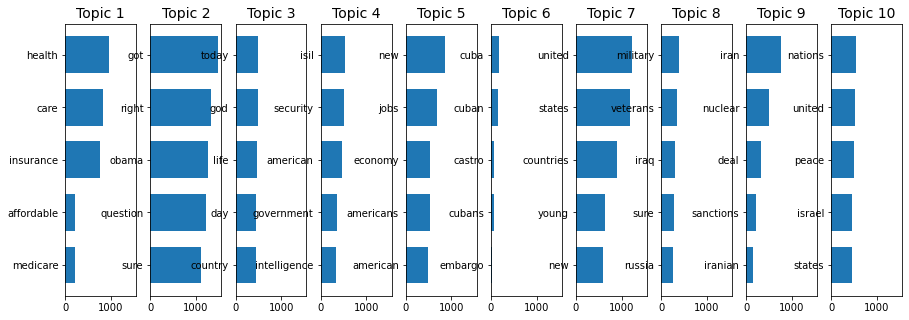

In [130]:
n_top_words = 5
fig, axes = plt.subplots(1, 10, figsize=(15, 5), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tf_feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 14})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)

In [137]:
a=lda.transform(tf_matrix)
z_labels = lda.predict_log_proba(a)

AttributeError: 'LatentDirichletAllocation' object has no attribute 'predict_log_proba'

In [ ]:
popularity ratings
pair of topics that are more correlated
assign topic to each speech
check PCA

In [ ]:
cfd = nltk.ConditionalFreqDist(collection)
fig  = plt.figure(figsize=(15,8))
cfd.plot();